In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\Malathi\EDA\AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
data['Month'] = pd.to_datetime(data['Month'])

In [3]:
data = data.set_index(['Month'])

In [4]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


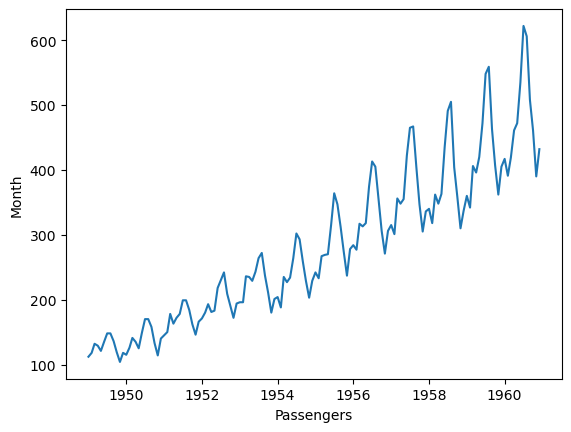

In [5]:
plt.xlabel("Passengers")
plt.ylabel("Month")
plt.plot(data)

In [6]:
roll_mean = data.rolling(window = 12).mean()
roll_std = data.rolling(window =12).std()

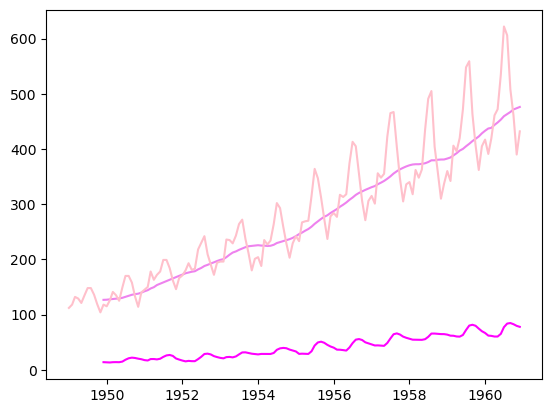

In [7]:
plt.plot(roll_mean, c='violet')
plt.plot(roll_std, c='magenta')
plt.plot(data, c='pink')

In [8]:
#ADF test
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(data['#Passengers'])
adftest

(0.8153688792060508,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

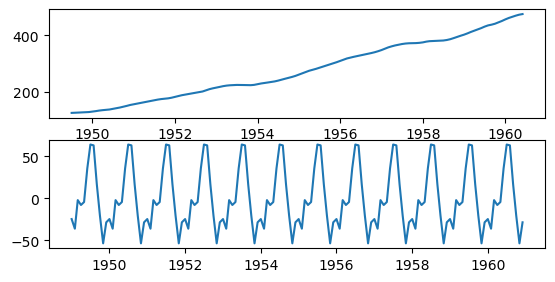

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data)

trend = decompose.trend
season = decompose.seasonal

plt.subplot(311)
plt.plot(trend)
plt.subplot(312)
plt.plot(season)

In [10]:
data_stn = data['#Passengers'] - data['#Passengers'].shift(2)
adfuller(data_stn.dropna())

(-2.9616951355554195,
 0.038629757676988855,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

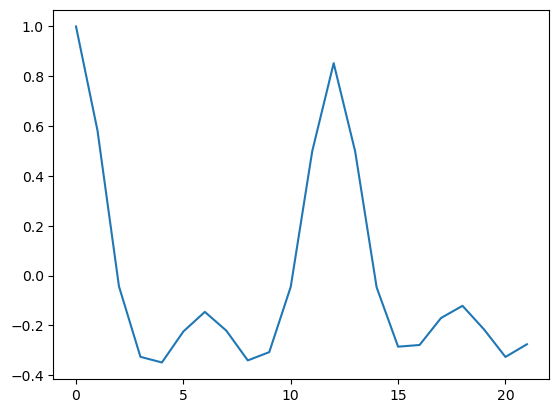

In [16]:
from statsmodels.tsa.stattools import acf, pacf
dacf = acf(data_stn.dropna())
dpacf = pacf(data_stn.dropna())
plt.plot(dacf)

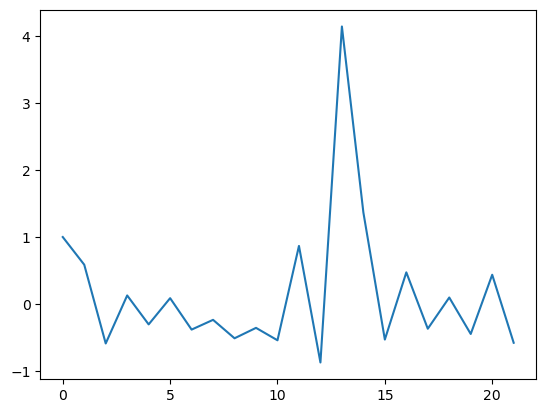

In [17]:
plt.plot(dpacf)

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order = (4, 2, 2), seasonal_order = (4, 2, 2, 12));
model_fit = model.fit()
res = model_fit.forecast(24)

C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\vinod\miniconda3\envs\mini\lib\site-packages\statsmodels\base\model.py:604: ConvergenceW

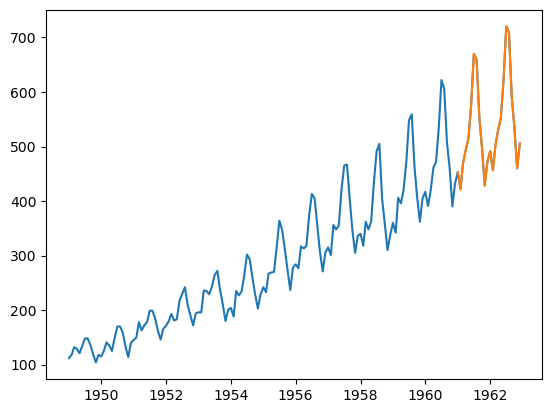

In [48]:
res = pd.DataFrame(res)
res.columns = ['#Passengers']
data_final = pd.DataFrame(data)
data_pred = pd.concat([data_final, res])
plt.plot(data_pred)
plt.plot(res)

In [35]:
?pd.concat